In [25]:
# Hongfei Yang 783661, Machine Learning 2018 S1 Project 2 code
# part of the code are adatped from sklearn website and other sources
# speical thanks to Javed Shaikh for his inspiration @ https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

import os
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

import multiprocessing
import time
import matplotlib.pyplot as plt
os.listdir("./")

['freq.pl',
 'proj2.pdf',
 'X_dev_feature.txt',
 'train.proc',
 'schler_springsymp06.pdf',
 'test',
 'iris',
 'COMP30027_2018S1_proj2-rubric.pdf',
 'top10.txt',
 'COMP30027_2018S1_proj2-data.tgz',
 'model.pickle',
 'X_train_feature.txt',
 'report-template.rtf',
 'MachineLearningProject2.ipynb',
 'test_top10.csv',
 'test.py',
 'train.freq',
 'scripts-README.txt',
 'out.csv',
 'train_top10.csv',
 'dev_raw.csv',
 'csv.pl',
 'COMP30027_2018S1_proj2-spec.pdf',
 'process.pl',
 'test_raw.csv',
 'train_raw.csv',
 'README.txt',
 '.ipynb_checkpoints',
 'dev_top10.csv']

In [2]:
#print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

#plt.show()

In [3]:
def load_data(transform=True):
    header_str = "Instance_ID,anyways,cuz,digest,diva,evermean,fox,gonna,greg,haha,jayel,kinda,levengals,literacy,lol,melissa,nan,nat,postcount,ppl,rick,school,shep,sherry,spanners,teri,u,ur,urllink,wanna,work,Class"
    train_top10_header = header_str.split(",")
    train_top10 = pd.read_csv("train_top10.csv", header=None)
    train_top10.columns = train_top10_header

    dev_top10 = pd.read_csv("dev_top10.csv", header=None)
    dev_top10.columns = train_top10_header


    X_train = train_top10.iloc[:,1:-1]
    y_train = train_top10.iloc[:,-1]
    X_test = dev_top10.iloc[:,1:-1]
    y_test = dev_top10.iloc[:,-1]

    if transform:
        le_train = LabelEncoder()
        y_train = le_train.fit_transform(y_train)
        """ohe = OneHotEncoder()
        ohe.fit_transform(X_train)
        ohe.feature_indices_
        ohe.n_values_"""
        le_test = LabelEncoder()
        y_test = le_test.fit_transform(y_test)
        le_test.classes_
        
    return X_train, y_train, X_test, y_test

def load_train_data():
    header_str = "Instance_ID,anyways,cuz,digest,diva,evermean,fox,gonna,greg,haha,jayel,kinda,levengals,literacy,lol,melissa,nan,nat,postcount,ppl,rick,school,shep,sherry,spanners,teri,u,ur,urllink,wanna,work,Class"
    train_top10_header = header_str.split(",")
    train_top10 = pd.read_csv("train_top10.csv", header=None)
    train_top10.columns = train_top10_header
    train_top10.drop(columns="Instance_ID", inplace=True)
    return train_top10

def load_dev_data():
    header_str = "Instance_ID,anyways,cuz,digest,diva,evermean,fox,gonna,greg,haha,jayel,kinda,levengals,literacy,lol,melissa,nan,nat,postcount,ppl,rick,school,shep,sherry,spanners,teri,u,ur,urllink,wanna,work,Class"
    train_top10_header = header_str.split(",")
    dev_top10 = pd.read_csv("dev_top10.csv", header=None)
    dev_top10.columns = train_top10_header
    dev_top10.drop(columns="Instance_ID", inplace=True)
    return dev_top10

def load_test_data():
    header_str = "Instance_ID,anyways,cuz,digest,diva,evermean,fox,gonna,greg,haha,jayel,kinda,levengals,literacy,lol,melissa,nan,nat,postcount,ppl,rick,school,shep,sherry,spanners,teri,u,ur,urllink,wanna,work,Class"
    train_top10_header = header_str.split(",")
    dev_top10 = pd.read_csv("test_top10.csv", header=None)
    dev_top10.columns = train_top10_header
    dev_top10.drop(columns="Instance_ID", inplace=True)
    return dev_top10

def combine_data():
    
    train_top10 = load_train_data()
    dev_top10 = load_dev_data()
    
    return pd.concat([train_top10, dev_top10], axis=0, ignore_index=True)
    
def load_raw_data(name):
    header_str = "User_ID,Gender,Age,Occupation,Star_Sign,Date,Text"
    header = header_str.split(",")
    if name not in ('train','test','dev'):
        return 'invalid name'
    else:
        data = pd.read_csv(name+"_raw.csv", header=None)
        data.columns=header
        return data

def load_top_10_data(name):
    if name not in ('train','test','dev'):
        return 'invalid name'
    else:
        header_str = "Instance_ID,anyways,cuz,digest,diva,evermean,fox,gonna,greg,haha,jayel,kinda,levengals,literacy,lol,melissa,nan,nat,postcount,ppl,rick,school,shep,sherry,spanners,teri,u,ur,urllink,wanna,work,Class"
        top10_header = header_str.split(",")
        top10 = pd.read_csv(name+"_top10.csv", header=None)
        top10.columns = top10_header
        top10.drop(columns="Instance_ID", inplace=True)
        return top10

def get_new_X_y(new_data, transform=False, encoder=False):
    
    X_train = new_data.iloc[:,:-1]
    y_train = new_data.iloc[:,-1]
    
    le_train = LabelEncoder()
    new_y_train = le_train.fit_transform(y_train)
    
    if transform:
        return X_train, y_train
    else:
        if encoder:
            return X_train, new_y_train, le_train
        else:
            return X_train, new_y_train

def split_X_y(data):
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    return X, y

In [5]:
train_raw = load_raw_data('train')
dev_raw = load_raw_data('dev')
test_raw = load_raw_data('test')

train_raw_grouby_ID = train_raw.groupby('User_ID')
test_raw_grouby_ID = test_raw.groupby('User_ID')

train_top10 = load_top_10_data('train')
test_top10 = load_top_10_data('test')
dev_top10 = load_top_10_data('dev')


#train = pd.concat([pd.DataFrame(train_raw.iloc[:,-1].apply(len)), train_top10], axis=1, ignore_index=True)
#dev = pd.concat([pd.DataFrame(dev_raw.iloc[:,-1].apply(len)), dev_top10], axis=1, ignore_index=True)

#train = pd.concat([dev_top10, train_top10], axis=0, ignore_index=True)


train = train_top10
dev = dev_top10
test = test_top10

X_train, y_train = split_X_y(train)
X_test, y_test = split_X_y(test)
X_dev, y_dev = split_X_y(dev)
#X = pd.concat([X_train, X_test],ignore_index=True)
#y = pd.concat([y_train, y_test],ignore_index=True)

le = LabelEncoder()
#X = X.apply(le.fit_transform)
y_train = le.fit_transform(y_train)
classes = le.classes_
classes = list(classes) + ['?']
classes
#enc = OneHotEncoder()
#enc.fit(X)

#onehotlabels = enc.transform(X).toarray()

#X_train, X_test = onehotlabels[:len(X_train),:], onehotlabels[len(X_train):,:]
#y_train, y_test = y[:len(y_train)], y[len(y_train):]




['14-16', '24-26', '34-36', '44-46', '?']

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy score 0.3815847524927204
Normalized confusion matrix
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

      14-16       0.00      0.00      0.00     13100
      24-26       0.38      1.00      0.55     17298
      34-36       0.00      0.00      0.00      2584
      44-46       0.00      0.00      0.00       551
          ?       0.00      0.00      0.00     11799

avg / total       0.15      0.38      0.21     45332



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


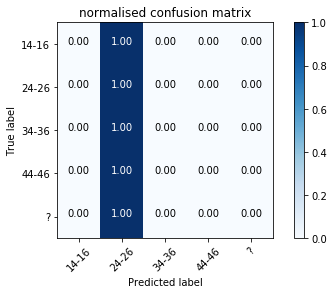

In [27]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train, y_train)
print("accuracy score", accuracy_score(y_pred=le.inverse_transform(clf.predict(X_dev)), y_true=y_dev))
cm = confusion_matrix(y_pred=le.inverse_transform(clf.predict(X_dev)), y_true=y_dev)
plot_confusion_matrix(cm, classes=classes, normalize=True, title='normalised confusion matrix')
print(classification_report(y_pred=le.inverse_transform(clf.predict(X_dev)), y_true=y_dev, target_names=classes))

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy score 0.4333803935409865
Normalized confusion matrix
[[3.33816794e-01 6.64427481e-01 1.14503817e-03 6.10687023e-04
  0.00000000e+00]
 [1.14753151e-01 8.82529772e-01 2.31240606e-03 4.04671060e-04
  0.00000000e+00]
 [5.10835913e-02 9.46207430e-01 2.70897833e-03 0.00000000e+00
  0.00000000e+00]
 [5.98911071e-02 9.38294011e-01 1.81488203e-03 0.00000000e+00
  0.00000000e+00]
 [1.72980761e-01 8.24476651e-01 2.03407068e-03 5.08517671e-04
  0.00000000e+00]]


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

      14-16       0.51      0.33      0.40     13100
      24-26       0.42      0.88      0.57     17298
      34-36       0.08      0.00      0.01      2584
      44-46       0.00      0.00      0.00       551
          ?       0.00      0.00      0.00     11799

avg / total       0.31      0.43      0.33     45332

[0.02967095 0.02991878 0.01588883 0.02007226 0.00673829 0.01450771
 0.05842728 0.01111657 0.06252714 0.00124479 0.02784442 0.00158684
 0.00564982 0.09156591 0.00777606 0.00286215 0.00555975 0.00885821
 0.02466262 0.03624343 0.05873663 0.00514479 0.00445922 0.00423854
 0.00147212 0.10713842 0.01414667 0.22083409 0.02990186 0.09120586]
[(0.22083408731901263, 'urllink'), (0.10713842324142733, 'u'), (0.0915659139803295, 'lol'), (0.09120585959152207, 'work'), (0.06252713757956069, 'haha'), (0.05873662954323776, 'school'), (0.05842728056910491, 'gonna'), (0.036243432616631946, 'rick'), (0.02991877729381011, 'cuz'), (0.029901

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


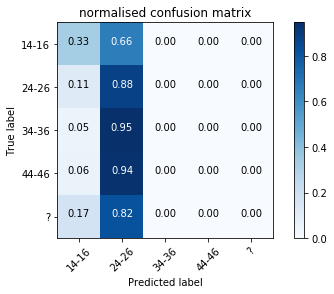

In [25]:
# Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None)
clf.fit(X_train, y_train)
print("accuracy score", accuracy_score(y_pred=le.inverse_transform(clf.predict(X_dev)), y_true=y_dev))
cm = confusion_matrix(y_pred=le.inverse_transform(clf.predict(X_dev)), y_true=y_dev)
plot_confusion_matrix(cm, classes=classes, normalize=True, title='normalised confusion matrix')
print(classification_report(y_pred=le.inverse_transform(clf.predict(X_dev)), y_true=y_dev, target_names=classes))
print(clf.feature_importances_)


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy score 0.43393188034942204


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Normalized confusion matrix
[[3.37022901e-01 6.62519084e-01 3.81679389e-04 7.63358779e-05
  0.00000000e+00]
 [1.15620303e-01 8.81720430e-01 2.48583651e-03 1.73430454e-04
  0.00000000e+00]
 [5.14705882e-02 9.46981424e-01 1.54798762e-03 0.00000000e+00
  0.00000000e+00]
 [5.44464610e-02 9.43738657e-01 1.81488203e-03 0.00000000e+00
  0.00000000e+00]
 [1.75947114e-01 8.23035850e-01 8.47529452e-04 1.69505890e-04
  0.00000000e+00]]


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

      14-16       0.51      0.34      0.41     13100
      24-26       0.42      0.88      0.57     17298
      34-36       0.06      0.00      0.00      2584
      44-46       0.00      0.00      0.00       551
          ?       0.00      0.00      0.00     11799

avg / total       0.31      0.43      0.33     45332



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


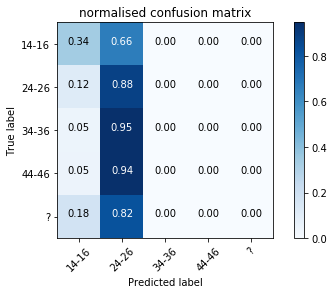

In [14]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
print("accuracy score", accuracy_score(y_pred=le.inverse_transform(clf.predict(X_dev)), y_true=y_dev))
cm = confusion_matrix(y_pred=le.inverse_transform(clf.predict(X_dev)), y_true=y_dev)
plot_confusion_matrix(cm, classes=classes, normalize=True, title='normalised confusion matrix (Adaptive Boosting)')
print(classification_report(y_pred=le.inverse_transform(clf.predict(X_dev)), y_true=y_dev, target_names=classes))


In [ ]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train, y_train)
accuracy_score(clf.predict(X_test), y_test)

In [72]:
import os
import time
import string
import pickle

from operator import itemgetter

from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report as clsr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split as tts

In [ ]:
le=LabelEncoder()
le.fit(y_train)

In [75]:
y_pred_dev = le.inverse_transform(y_pred_dev)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [66]:
accuracy_score(le.inverse_transform(y_pred_dev), y_dev)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.5109635577516985

In [67]:
X_test = test_raw.iloc[:,-1]
y_test = test_top10.iloc[:,-1]
y_pred_test = model.predict(X_test)
y_pred_test = le.inverse_transform(y_pred_test)


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
import string
import time

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


stopwords = set(stopwords.words('english'))
punct = set(string.punctuation)
def lemmatize(token, tag):
    '''
    convert pos tag to wordnet tag for lemmatisation
    '''
    tag = {
        'N' : 'n',
        'V' : 'v',
        'J' : 'a',
        'R' : 'r'
    }.get(tag[0], wordnet.NOUN)

    return WordNetLemmatizer().lemmatize(token, tag)
    
def tokenize(document):
    """
    Returns a normalized, lemmatized list of tokens from a document by
    applying segmentation (breaking into sentences), then word/punctuation
    tokenization, and finally part of speech tagging. It uses the part of
    speech tags to look up the lemma in WordNet, and returns the lowercase
    version of all the words, removing stopwords and punctuation.
    """
    
    lemmas = []
    
    # Break the document into sentences
    for sent in sent_tokenize(document):
        # Break the sentence into part of speech tagged tokens
        for token, tag in pos_tag(wordpunct_tokenize(sent)):
            # Apply preprocessing to the token
            token = token.lower().strip().strip('_').strip('*')

            # If punctuation or stopword, ignore token and continue
            if token in stopwords or all(char in punct for char in token):
                #print("Stopword", token)
                continue

            # Lemmatize the token and yield
            lemma = lemmatize(token, tag)
            lemmas.append(lemma)
    
    return lemmas


def tokenizer_(arg):
    return arg

curr_time = time.time()



from multiprocessing import cpu_count
 
cores = cpu_count() 
partitions = cores 

def worker(data):
    return data.apply(tokenize)

# parallelised preprocessing of raw files
def parallelize_apply(data, func):
    data_split = np.array_split(data, partitions)
    pool = multiprocessing.Pool(cores)
    data = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return data

# Skip this part if you have alrady found trained feature files, this takes a long time

print("Training...")

X_train = parallelize_apply(train_raw.iloc[:,-1], worker).tolist()
y_train = train_top10.iloc[:,-1]

print("Training transform complete, cost", time.time() - curr_time)

le=LabelEncoder()
y_train = le.fit_transform(y_train)

print("Deving")

X_dev = parallelize_apply(dev_raw.iloc[:,-1], worker).tolist()
y_dev = dev_top10.iloc[:,-1]

print("Dev transform complete, cost", time.time() - curr_time)

In [13]:
# saving new feature files, or you can load trained feature files
import pickle

with open("X_train_feature.txt", "wb") as fp:   
    pickle.dump(X_train, fp)
    
with open("X_dev_feature.txt", "wb") as fp:   
    pickle.dump(X_dev, fp)

with open("X_train_feature.txt", "rb") as fp:   # Unpickling
    X_train = pickle.load(fp)
    
with open("X_dev_feature.txt", "rb") as fp:   # Unpickling
    X_dev = pickle.load(fp)

In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('vect', TfidfVectorizer(tokenizer=tokenizer_, preprocessor=None, lowercase=False)),
                     ('clf', SGDClassifier())
                    ])

print("Fitting...")
curr_time = time.time()
clf = clf.fit(X_train, y_train)

print("Fitting complete, cost", time.time() - curr_time)

y_dev_pred = le.inverse_transform(clf.predict(X_dev))

accuracy score 0.5106988440836495
Normalized confusion matrix
[[5.56946565e-01 4.43053435e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [8.29575673e-02 9.16579951e-01 2.89050757e-04 1.73430454e-04
  0.00000000e+00]
 [2.59287926e-02 9.74071207e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.44827586e-02 9.65517241e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.14001187e-01 7.85744555e-01 1.69505890e-04 8.47529452e-05
  0.00000000e+00]]


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

      14-16       0.64      0.56      0.60     13100
      24-26       0.47      0.92      0.62     17298
      34-36       0.00      0.00      0.00      2584
      44-46       0.00      0.00      0.00       551
          ?       0.00      0.00      0.00     11799

avg / total       0.36      0.51      0.41     45332



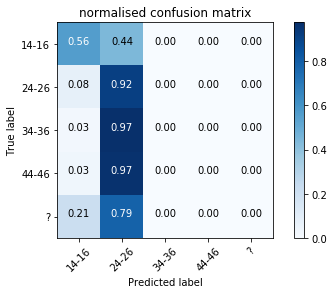

In [24]:
print("accuracy score", accuracy_score(y_pred=y_dev_pred, y_true=y_dev))
cm = confusion_matrix(y_pred=y_dev_pred, y_true=y_dev)
plot_confusion_matrix(cm, classes=classes, normalize=True, title='normalised confusion matrix')
print(classification_report(y_pred=y_dev_pred, y_true=y_dev, target_names=classes))

In [ ]:
# grid search to tune parameters. Warning, it may crap your computer, run with caution
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'vect__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
             }
gs_clf = GridSearchCV(clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)
print(gs_clf.best_score_)
print(gs_clf.best_params_)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/s

In [11]:
# output to formatted csv
def get_formatted_output(y_pred):
    result = pd.DataFrame(y_pred)
    index_list = ['3'+str(i+1) for i in range(len(result))]
    index_list = pd.DataFrame(index_list)
    result = pd.concat([index_list, result], axis=1)

    result.columns=['Id','Prediction']

    result.to_csv('out.csv',index=False,index_label=False)
    return result

#y_pred = clf.predict(X_test)
#y_pred = y_p
#new_dev_top10 = pd.concat([dev_raw.iloc[:,0], pd.DataFrame(y_pred), dev_top10], axis=1, ignore_index=True)

new_dev_top10 = pd.concat([test_raw.iloc[:,0], pd.DataFrame(y_pred_test), test_top10], axis=1, ignore_index=True)
y_test = y_test


run_test(k=0.33)

# tuning using index information
def run_test(k=0.71, isTest=False):
    counter = 0
    error_counter = 0
    total_error_instance = 0
    correct_counter = 0

    corrected_dict = {}

    for key, val in new_dev_top10.groupby(0):

        val_ = val.groupby(1)
        first_max = None
        first_max_name = None
        second_max = None

        if len(val_) > 1:
            max_list = [len(i[1]) for i in list(val_.groups.items())]
            max_list_cpy=max_list.copy()
            first_max = max(max_list)
            first_max_name = [i[0] for i in list(val_.groups.items()) if len(i[1])==first_max][0]
            max_list.remove(first_max)
            second_max = max(max_list)
            counter += 1

            if ((first_max - second_max) / first_max) < k:
            #if np.std(max_list_cpy) < k*10:
                #print(key)
                #print([(i[0], len(i[1])) for i in val_.groups.items()])
                error_counter+=1
            else:
                corrected_dict[key] = first_max_name
                total_error_instance += sum(max_list)
        else:
            correct_counter+=1

    
    #print(error_counter, counter, correct_counter, total_error_instance)

    new_y_pred = []

    for i in range(len(new_dev_top10)):

        val = corrected_dict.get((new_dev_top10.iloc[i,0]), None)
        if val == None:
            new_y_pred.append(new_dev_top10.iloc[i,1])
        else:
            new_y_pred.append(val)
    if isTest:
        return new_y_pred
    
    return (k, accuracy_score(y_pred=new_y_pred, y_true=y_test))

result = []
p = multiprocessing.Pool()
result = p.map(run_test, [i/100 for i in range(1,100)])
p.close()
print(sorted(result, key=lambda item:item[1], reverse=True)[0])

plt.scatter([i[0] for i in result],[i[1] for i in result])
plt.show()

len(get_formatted_output(run_test(k=0.33, isTest=True)))